NAMA : HANI AMIRA DAMAYANTI  
 NIM  : A11.2021.13428

Note: Disini saya membuat projek UAS ini menggunakan Laptop bapak saya, jadi nama usernya beda, Karena di laptop saya jupyter notebook tidak dapat di install, Mohon kebijakannya, Terimakasih.

# Perbandingan Kinerja Algoritma Naive Bayes dan Pengembangan Multinomial Naive Bayes dalam Klasifikasi Dataset Tabular Student Mental Health.

# 1. Ringkasan Masalah:
Pendekatan klasifikasi menggunakan algoritma Naive Bayes telah menunjukkan potensi dalam menganalisis dataset kesejahteraan mental mahasiswa. Algorima Naïve Bayes biasanya menggunakan dataset kategorikal, numerik, atau dalam format waktu yang terstruktur (dataset tabular) yang dapat memperlihatkan perfoma yang baik saat mengklasifikasi menggunakan algoritma ini tetapi tidak dengan dataset yang lebih kompleks seperti dataset teks. Dengan ini, penelitiaan menemukan algoritma lain yaitu Multinomial naive bayes yang dimana dapat bekerja dengan dataset teks yang lebih kompleks, walaupun Multinomial naive bayes dapat digunakan dengan dataset tabular, tetapi apakah Multinomial naive bayes dapat bekerja lebih baik dibandingkan dengan naïve bayes di dataset tabular?. Namun, perbandingan langsung antara kinerja Naive Bayes tradisional dan pengembangan Multinomial Naive Bayes dalam konteks klasifikasi Dataset Tabular kesejahteraan mental mahasiswa belum sepenuhnya dieksplorasi.

# 2. Tujuan Yang Akan Di Capai:
Untuk Membandingkan kinerja Algoritma Naive Bayes dan Pengembangan Multinomial Naive Bayes dalam Klasifikasi Dataset Tabular Student Mental Health, Hal ini penting untuk menentukan algoritma mana yang lebih efektif dalam konteks dataset.

# 3. Model/Alur Penyelesaian:
                        DATASET
             STUDENTS MENTAL HEALTH SURVEY
                           |
                           |
                   DATA PREPROCESSING,
                   FEATURE WEIGHTING
                           |
                           |
                TRAINING DAN TESTING DATA
                  /                \
                 /                  \
                /                    \
          MODEL ALGORITMA      MODEL ALGORITMA
            NAIVE BAYES     MULTINOMIAL NAIVE BAYES
                \                    /
                 \                  /
                  \                /
           HASIL (AKURASI, PRESISI, RECALL,
         F1-SCORE) DALAM BENTUK CONFUSION MATRICS

# 4. Dataset:
Data yang digunakan dalam penelitian ini adalah data public yang diambil dari Kaggle.com tentang data student mental health survey. Dataset dapat di unduh dari laman Students Mental Health Assessments (kaggle.com) . Jumlah data sebanyak 7022 record dengan 20 atribut. Data tersebut berkaitan dengan kesehatan mental mahasiswa dan siswa. Dataset mewakili evaluasi kesehatan mental siswa. Kumpulan data ini berusaha memberikan wawasan berharga tentang kesehatan mental Mahasiswa dan siswa dengan menangkap sejumlah faktor yang dapat memengaruhi kesehatan mental mereka.

Dataset terdiri dari:

1. Stress_Level: Tingkat stres yang dialami oleh individu.
2. Depression_Score: Skor yang mewakili tingkat depresi yang dialami oleh individu.
3. Anxiety_Score: Skor yang mewakili tingkat kecemasan yang dialami oleh individu.
4. Sleep_Quality: Kualitas tidur yang dialami oleh individu .
5. Physical_Activity: Tingkat aktivitas fisik .
6. Diet_Quality: Kualitas diet individu.
7. Social_Support: Tingkat dukungan sosial yang diterima oleh individu.
8. Substance_Use: Frekuensi penggunaan narkoba seperti alkohol, rokok atau obat-obatan lainnya.
9. Family_History: Apakah individu tersebut memiliki riwayat keluarga dengan masalah kesehatan mental.
10. Chronic_Illness: Financial_Stress: Tingkat stres finansial yang dialami oleh individu (antara 0 dan 5).
11. Semester_Credit_Load: Jumlah kredit yang diambil individu pada semester (15-30).

Atribut Tipe Data: Age (Integer), Course (String), Gender (String), CGPA (Integer), Stress_Level (Integer), Depression_Score (Integer), Anxiety_Score (Integer), Sleep_Quality (String), Physical_Activity (String), Diet_Quality (String), Social_Support (String), Relationship_Status (String), Substance_Use (String), Counseling_Service_Use (String), Family_History (Boolean), Chronic_Illness (Boolean), Financial_Stress (Integer), Extracurricular_Involvement (String), Semester_Credit_Load (Integer), Residence_Type (String).

# 5. Loading Data:

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [93]:
#Memuat data 

df = pd.read_csv(r'C:\Users\Budi Hastono\Desktop\jupyter\students_mental_health_survey.csv')

df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


# 6. Exploratory Data Analysis (EDA):
Langkah awal dalam proses machine learning yang digunakan untuk memahami lebih dalam mengenai data yang akan digunakan dalam model.

Descriptive Statistics.

In [94]:
print(df.describe())
print(df.info())


               Age        CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  7022.000000  7010.00000   7022.000000       7022.000000    7022.000000   
mean     23.003418     3.49127      2.427941          2.254486       2.300484   
std       3.853978     0.28742      1.638408          1.625193       1.624305   
min      18.000000     2.44000      0.000000          0.000000       0.000000   
25%      20.000000     3.29000      1.000000          1.000000       1.000000   
50%      22.000000     3.50000      2.000000          2.000000       2.000000   
75%      25.000000     3.70000      4.000000          3.000000       4.000000   
max      35.000000     4.00000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       7022.000000           7022.000000  
mean           2.453005             22.010538  
std            1.708995              4.358380  
min            0.000000             15.000000  
25%            1.000000       

Missing Values.

In [95]:
print(df.isnull().sum())


Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64


Data Distribution.

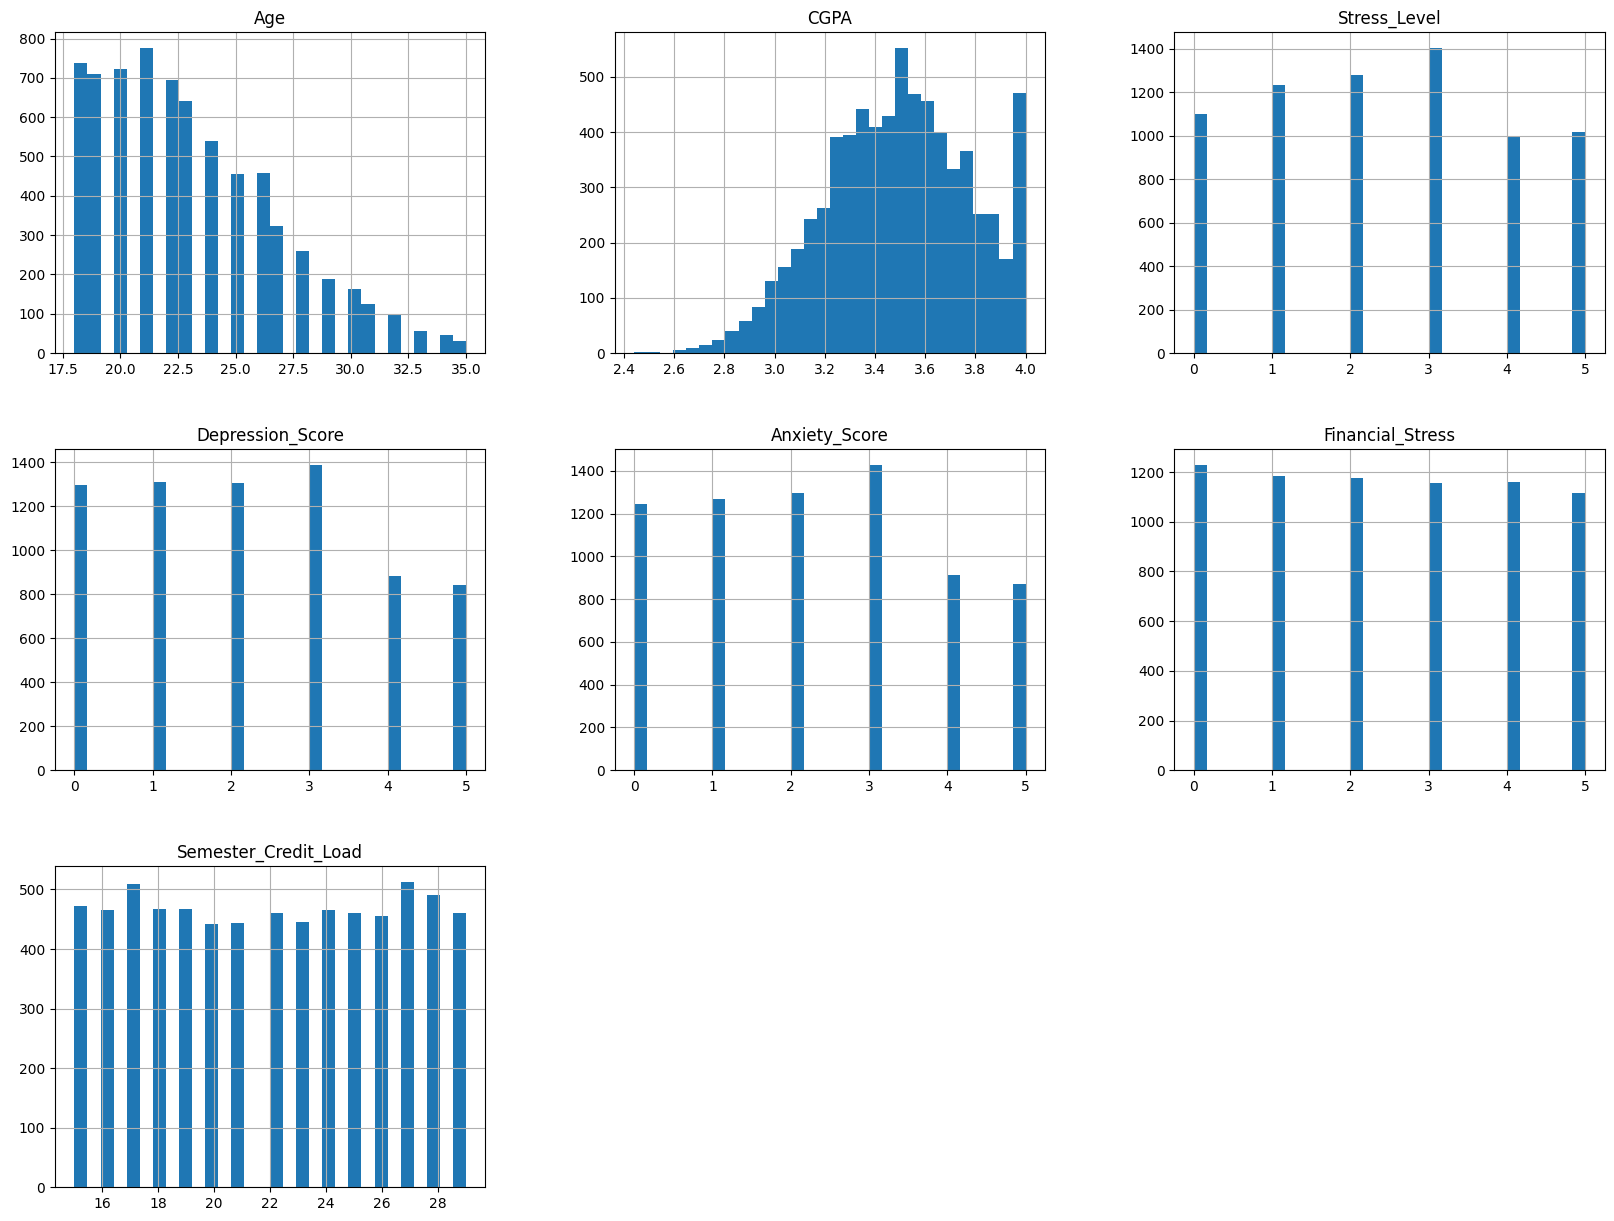

In [96]:
df.hist(bins=30, figsize=(20, 15))
plt.show()


In [97]:
print(df.dtypes)


Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object


Correlation Matrix.

Kolom non-numerik: Index(['Course', 'Gender', 'Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support', 'Relationship_Status',
       'Substance_Use', 'Counseling_Service_Use', 'Family_History',
       'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type'],
      dtype='object')


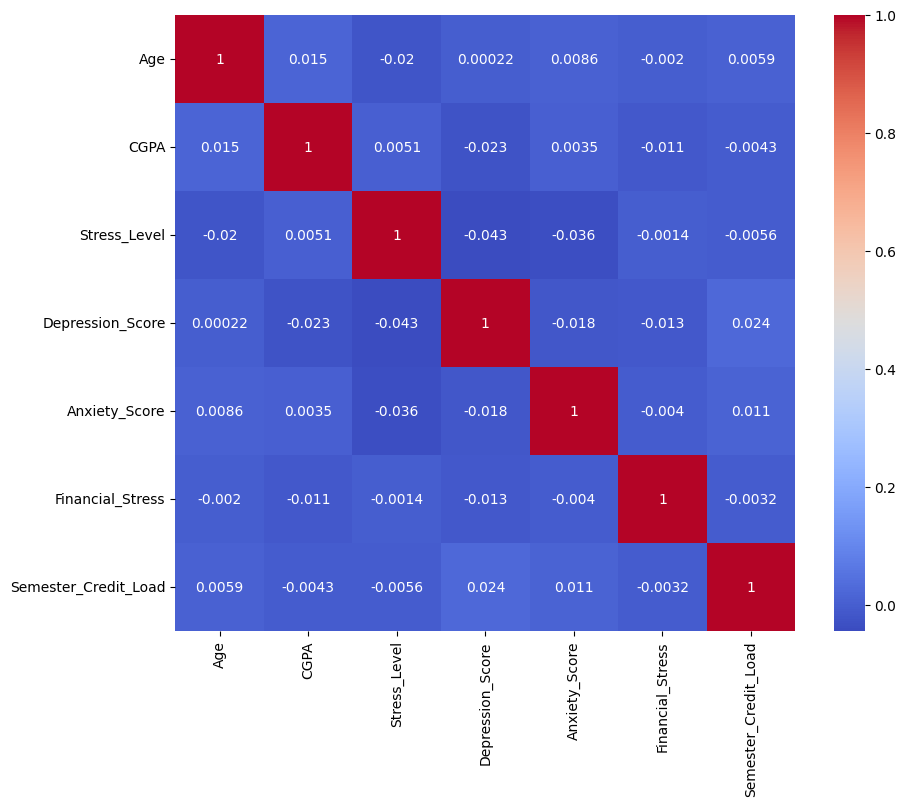

In [98]:
# Menghilangkan spasi tambahan pada nama kolom
df.columns = df.columns.str.strip()

# Mengidentifikasi kolom non-numerik
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Kolom non-numerik: {non_numeric_columns}")

# Menghapus kolom non-numerik untuk visualisasi korelasi
df_numeric = df.drop(non_numeric_columns, axis=1)

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()



# 7. Features Dataset:
Dalam projek ini saya menggunakan Pipeline yang dimana cara untuk menggabungkan langkah pemroresan data (preprocessing, feature, dan normalisasi) dalam satu rangkaian yang berjalan secara berurutan, hal ini memudahkan dalam pengerjaan projek.

Splitting Features dan Target Variabel.

In [99]:
# Pastikan nama kolom yang digunakan benar-benar sesuai dengan yang ada dalam DataFrame
X = df.drop('Depression_Score', axis=1)
y = df['Depression_Score']


Data Splitting.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Identifikasi kolom numerik dan kategorikal setelah encoding: digunakan untuk memisahkan fitur-fitur numerik dan kategorikal dari dataset "X".

In [142]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in X.columns if col not in numeric_features]


Pipeline untuk Fitur Kategorikal: memproses fitur-fitur kategorikal dalam dataset dengan mengisi nilai yang hilang menggunakan nilai yang paling sering muncul dan mengubahnya menjadi representasi biner menggunakan OneHotEncoder.

In [144]:
# Feature Scaling and Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 8. Proses Learning / Modeling:

# a. Naive Bayes

Sebuah pipeline yang menggabungkan preprocessing untuk fitur-fitur kategorikal dengan model klasifikasi Gaussian Naive Bayes.

In [145]:
# Pipeline untuk preprocessing dan model
pipeline_gnb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


In [129]:
# Train model
pipeline_gnb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Course', 'Gender',
                                                   'Sleep_Quality',
                                                   'Physical_Activity',
                                                   'Diet_Quality',
                                                   'Social_Support',
                                                   'Relationship_Status',
                                                   'Substance_Use',
                                                   'Counseling_Service_Use',
                                                   'Family_History',
                                                   'Chronic_Illness',
                                                   'Extracurricular_Involvement',
                                                   'Residence_Type'])])),
                ('classifier', GaussianNB())])

# 9.1. Perfoma Naive Bayes:

In [130]:
# Prediction
y_pred_gnb= pipeline_gnb.predict(X_test)

Gaussian Naive Bayes
Accuracy: 0.21309919316563836
              precision    recall  f1-score   support

           0       0.22      0.68      0.33       392
           1       0.17      0.16      0.16       388
           2       0.21      0.06      0.09       396
           3       0.17      0.03      0.05       426
           4       0.25      0.19      0.22       270
           5       0.25      0.14      0.18       235

    accuracy                           0.21      2107
   macro avg       0.21      0.21      0.17      2107
weighted avg       0.21      0.21      0.17      2107



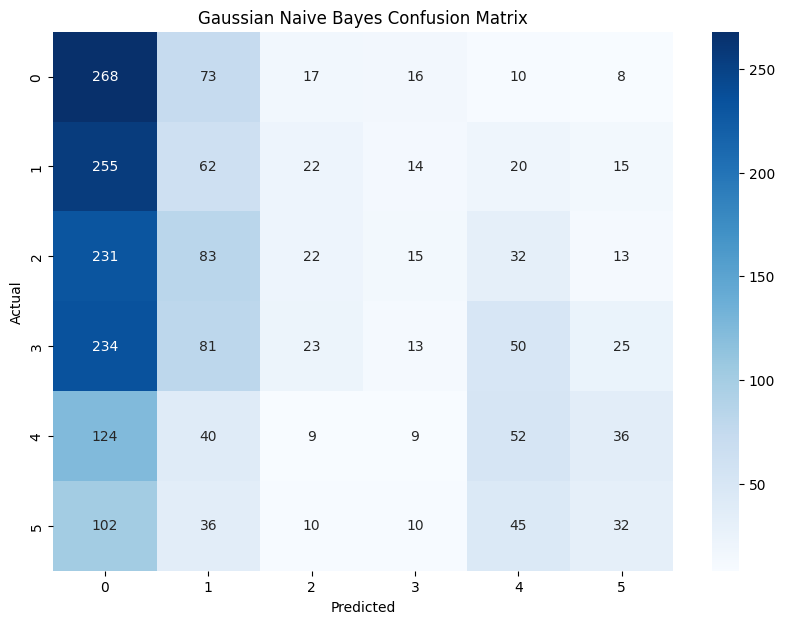

In [131]:
# Evaluation Gaussian Naive Bayes
print("Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb)}")
print(classification_report(y_test, y_pred_gnb))

conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

# b. Multinomial Naive Bayes 

Sebuah pipeline yang menggabungkan preprocessing untuk fitur-fitur kategorikal dengan model klasifikasi Multinomial Naive Bayes.

In [132]:
# Pipeline untuk preprocessing dan model Multinomial Naive Bayes
pipeline_mnb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])


In [133]:
# Train model
pipeline_mnb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Course', 'Gender',
                                                   'Sleep_Quality',
                                                   'Physical_Activity',
                                                   'Diet_Quality',
                                                   'Social_Support',
                                                   'Relationship_Status',
                                                   'Substance_Use',
                                                   'Counseling_Service_Use',
                                                   'Family_History',
                                                   'Chronic_Illness',
                                                   'Extracurricular_Involvement',
                                                   'Residence_Type'])])),
                ('classifier', MultinomialNB())])

In [134]:
# Prediction Multinomial Naive Bayes
y_pred_mnb = pipeline_mnb.predict(X_test)

# 9.2. Perfoma Multinomial Naive Bayes:

Multinomial Naive Bayes
Accuracy: 0.22116753678215473
              precision    recall  f1-score   support

           0       0.24      0.43      0.31       392
           1       0.18      0.23      0.20       388
           2       0.19      0.13      0.15       396
           3       0.23      0.18      0.20       426
           4       0.25      0.16      0.20       270
           5       0.27      0.17      0.21       235

    accuracy                           0.22      2107
   macro avg       0.23      0.22      0.21      2107
weighted avg       0.22      0.22      0.21      2107



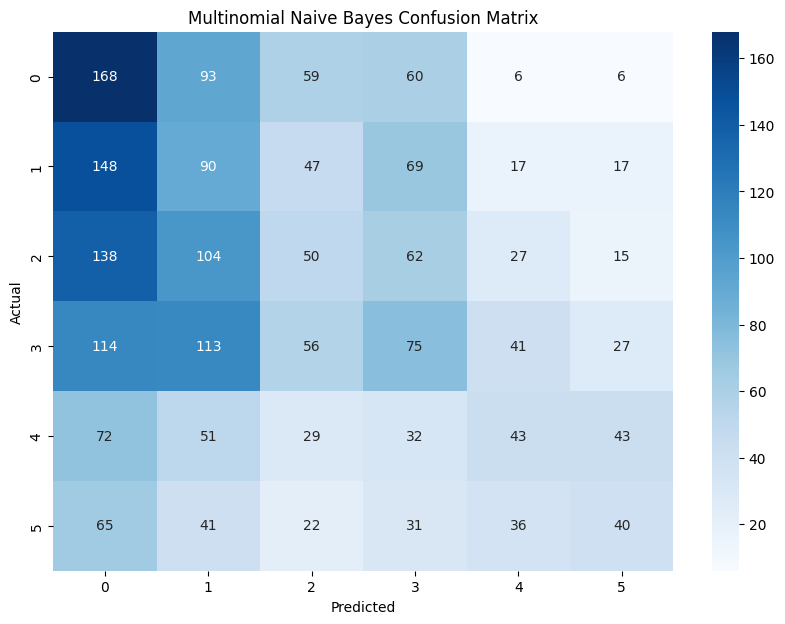

In [135]:
# Evaluation Multinomial Naive Bayes
print("Multinomial Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb)}")
print(classification_report(y_test, y_pred_mnb))

conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

# 10. Diskusi Hasil Dan Kesimpulan:


Dari penelitian Projek UAS Pembelajaran Mesin dengan judul "Perbandingan Kinerja Algoritma Naive Bayes dan Pengembangan Multinomial Naive Bayes dalam Klasifikasi Dataset Tabular Student Mental Health". Hasil Yang dicapai sesuai dengan Perfoma masing-masing Model Naive Bayes dan Model Multinomial Naive Bayes bahwa:

Gaussian Naive Bayes: 
1. Accuracy: 0.213
2. Precision: Rendah di semua kelas, rata-rata weighted precision sekitar 0.21.
3. Recall: Beragam antara 0.03 hingga 0.68 untuk setiap kelas.
4. F1-score: Rata-rata weighted F1-score sekitar 0.17.

Multinomial Naive Bayes:
1. Accuracy: 0.221
2. Precision: Rendah di semua kelas, rata-rata weighted precision sekitar 0.22.
3. Recall: Beragam antara 0.13 hingga 0.43 untuk setiap kelas.
4. F1-score: Rata-rata weighted F1-score sekitar 0.21.

Kesimpulan:
1. Accuracy: Kedua model memiliki akurasi yang rendah, dengan Multinomial Naive Bayes sedikit lebih tinggi.
2. Precision: Multinomial Naive Bayes memiliki precision yang sedikit lebih baik dibandingkan Gaussian Naive Bayes.
3. Recall: Kedua model memiliki recall yang bervariasi, tetapi Multinomial Naive Bayes cenderung lebih baik dalam beberapa kelas.
4. F1-score: Rata-rata weighted F1-score dari Multinomial Naive Bayes lebih tinggi.

Secara keseluruhan, meskipun perbedaan performa tidak signifikan, Multinomial Naive Bayes cenderung memberikan hasil yang sedikit lebih baik dalam hal precision, recall, dan F1-score dibandingkan dengan Gaussian Naive Bayes untuk dataset ini. Namun, baik Multinomial maupun Gaussian Naive Bayes keduanya menunjukkan tantangan dalam mengklasifikasikan dataset ini dengan baik, mungkin perlu pertimbangan lebih lanjut terkait tuning model atau fitur yang digunakan.



